In [1]:
# Dependencies
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy.stats import kendalltau
from scipy.stats import ttest_1samp
sns.set(style="ticks")
import reverse_geocoder as rg
from scipy.stats import ttest_ind

In [2]:
# The path to our CSV file
rig_file = "rig_count_output.csv"

# Read our rig count data into pandas
rig_df = pd.read_csv(rig_file)

rig_df.head()

,Unix,Alabama,Alaska,Arizona,Arkansas,California,Colorado,D.C.,Delaware,Florida,...,Tennesee,Texas,Utah,Vermont,Virginia,W. Virgina,Wash.,Wisconsin,Wyoming,Time
0,946684800.0,1.50,4.50,0.0,0.25,16.50,18.25,0.0,0.0,0.0,...,0.0,268.75,14.00,0.0,0.25,9.75,0.0,0.0,38.75,1.0
1,949363200.0,0.25,4.75,0.0,0.00,16.75,17.25,0.0,0.0,0.0,...,0.0,277.25,14.00,0.0,0.25,5.00,0.0,0.0,34.00,2.0
2,951868800.0,0.80,5.80,0.0,0.00,18.00,17.60,0.0,0.0,0.0,...,0.0,273.20,15.60,0.0,1.20,5.80,0.0,0.0,30.20,3.0
3,954547200.0,1.50,4.50,0.0,2.25,18.25,18.25,0.0,0.0,0.0,...,0.0,285.00,14.50,0.0,2.00,10.00,0.0,0.0,28.25,4.0
4,957139200.0,2.00,5.25,0.0,6.00,20.25,17.00,0.0,0.0,0.0,...,0.0,295.00,15.75,0.0,2.75,11.25,0.0,0.0,29.75,5.0


In [3]:
# The path to our CSV file
seismic_file = "seismic_data_9-28-17_4.csv"

# Read our rig count data into pandas
seismic_df = pd.read_csv(seismic_file)

seismic_df.head(15)

/Users/jeffreycoen/anaconda/envs/PythonData/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,alert,cd_by_month,cd_by_year,cd_for_plot,cdi,city,code,converted_date,coordinates_3,...,url,place.1,state,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,State
0,0,NaN,6-Apr,1906,12:27.0,NaN,san pablo,16957905,4/18/06,10.0,...,https://earthquake.usgs.gov/earthquakes/eventp...,San Pablo Bay,California,NaN,NaN,NaN,NaN,NaN,NaN,Alabama
1,1,NaN,6-Apr,1906,23:13.0,NaN,eureka,913200,4/18/06,15.0,...,https://earthquake.usgs.gov/earthquakes/eventp...,offshore Northern California,Ca,NaN,NaN,NaN,NaN,NaN,NaN,Arizona
2,2,NaN,18-Jul,1918,57:40.0,NaN,yaqui,913151,7/15/18,10.0,...,https://earthquake.usgs.gov/earthquakes/eventp...,Sonora,Mexico,NaN,NaN,NaN,NaN,NaN,NaN,Arkansas
3,3,NaN,18-May,1918,32:29.0,NaN,lake elsinore,913126,5/23/18,10.0,...,https://earthquake.usgs.gov/earthquakes/eventp...,Southern California,California,NaN,NaN,NaN,NaN,NaN,NaN,AZ
4,4,NaN,18-Apr,1918,53:21.0,NaN,winnemucca,913944,4/21/18,10.0,...,https://earthquake.usgs.gov/earthquakes/eventp...,Nevada,Nevada,NaN,NaN,NaN,NaN,NaN,NaN,B.C.
5,5,NaN,15-Oct,1915,15:13.0,NaN,topolobampo,911521,10/3/15,10.0,...,https://earthquake.usgs.gov/earthquakes/eventp...,Gulf of California,Ca,NaN,NaN,NaN,NaN,NaN,NaN,Bahama Islands
6,6,NaN,23-Aug,1923,21:04.0,NaN,camarillo,911838,8/28/23,10.0,...,https://earthquake.usgs.gov/earthquakes/eventp...,Greater Los Angeles area,California,NaN,NaN,NaN,NaN,NaN,NaN,BajaCalifornia
7,7,NaN,22-Mar,1922,12:54.0,NaN,santa barbara,908949,3/10/22,10.0,...,https://earthquake.usgs.gov/earthquakes/eventp...,Chihuahua,Mexico,NaN,NaN,NaN,NaN,NaN,NaN,Bermuda region
8,8,NaN,28-Nov,1928,51:03.0,NaN,grover beach,909604,11/1/28,10.0,...,https://earthquake.usgs.gov/earthquakes/eventp...,offshore Central California,Ca,NaN,NaN,NaN,NaN,NaN,NaN,Ca
9,9,NaN,27-Nov,1927,35:27.0,NaN,pacific grove,910175,11/4/27,10.0,...,https://earthquake.usgs.gov/earthquakes/eventp...,offshore Central California,Ca,NaN,NaN,NaN,NaN,NaN,NaN,California


In [4]:
#reverse_geo = seismic_df
#reverse_geo.columns

In [5]:
# Create a state column for the reverse_geo
#reverse_geo['State'] = ''
#reverse_geo.columns

In [6]:
#counter = 0
#result = []

# Populate the DF
#for index, row in reverse_geo.iterrows():
 #   try:
        # Counter keeps track of where we are in record retrieval process
   #     counter += 1
    #    coordinates = (row['lat'], row['lng'])
     #   print(coordinates)
        
      #  result = rg.search(coordinates) # default mode = 2
      #  print(result)
        #state = result['admin1']
        #print(result.get('admin1'))
        
        #reverse_geo.set_value(index, "State", result.get([OrderedDict][3]))#['admin1']))
        #break
        
        
                                      
                                      
       
   # except:
   #     print('error.')
       
        
        
#reverse_geo.head()

In [7]:
seismic_df.rename(columns={'epoch_by_month': 'Unix'}, inplace=True)
seismic_df.head()

,Unnamed: 0,alert,cd_by_month,cd_by_year,cd_for_plot,cdi,city,code,converted_date,coordinates_3,...,url,place.1,state,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,State
0,0,NaN,6-Apr,1906,12:27.0,NaN,san pablo,16957905,4/18/06,10.0,...,https://earthquake.usgs.gov/earthquakes/eventp...,San Pablo Bay,California,NaN,NaN,NaN,NaN,NaN,NaN,Alabama
1,1,NaN,6-Apr,1906,23:13.0,NaN,eureka,913200,4/18/06,15.0,...,https://earthquake.usgs.gov/earthquakes/eventp...,offshore Northern California,Ca,NaN,NaN,NaN,NaN,NaN,NaN,Arizona
2,2,NaN,18-Jul,1918,57:40.0,NaN,yaqui,913151,7/15/18,10.0,...,https://earthquake.usgs.gov/earthquakes/eventp...,Sonora,Mexico,NaN,NaN,NaN,NaN,NaN,NaN,Arkansas
3,3,NaN,18-May,1918,32:29.0,NaN,lake elsinore,913126,5/23/18,10.0,...,https://earthquake.usgs.gov/earthquakes/eventp...,Southern California,California,NaN,NaN,NaN,NaN,NaN,NaN,AZ
4,4,NaN,18-Apr,1918,53:21.0,NaN,winnemucca,913944,4/21/18,10.0,...,https://earthquake.usgs.gov/earthquakes/eventp...,Nevada,Nevada,NaN,NaN,NaN,NaN,NaN,NaN,B.C.


In [8]:
states = seismic_df.groupby(['Unix', 'state'])['mag'].count()
states
# Take a look at it in CSV
states.to_csv("states.csv")



In [21]:
# The path to our CSV file
states_file = "states_dated.csv"

# Read our rig count data into pandas
states_df = pd.read_csv(states_file)

states_df.fillna(value = 0)

states_df.head()



,Unix,Alabama,Arizona,Arkansas,AZ,B.C.,Bahama Islands,BajaCalifornia,Bermuda region,Ca,...,USA,Utah,Va,Vermont,Virginia,Wa,Washington,WestVirginia,Wyoming,Grand Total
0,-2011910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,-1712102400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,-1633219200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,-1630627200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,-1625356800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [10]:
#"counter = 0

#seismic_df['Time'] = ''
#rig_count_df['Unix'] = ''
# Populate the DF
#for index, row in seismic_df.iterrows():
  #  try:
        # Counter keeps track of where we are in record retrieval process
    #   counter += 1
    #   seismic_df.set_value(index, "Time", counter)
        
        
        
                                      
                                      
       
 #   except:
   #    print('error.')
       
        
        
#seismic_df.head()

In [15]:
combined_df = pd.merge(rig_df, states_df, on = 'Unix', how='outer', right_index = False, left_index=True)
combined_df.head()

#rig_df.join(seismic_df)
#rig_df.columns

,Unix,Alabama_x,Alaska,Arizona_x,Arkansas_x,California_x,Colorado_x,D.C.,Delaware,Florida_x,...,USA,Utah_y,Va,Vermont_y,Virginia_y,Wa,Washington,WestVirginia,Wyoming_y,Grand Total
1043,9.46685e+08,1.50,4.50,0.0,0.25,16.50,18.25,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1043,9.49363e+08,0.25,4.75,0.0,0.00,16.75,17.25,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1043,9.51869e+08,0.80,5.80,0.0,0.00,18.00,17.60,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1043,9.54547e+08,1.50,4.50,0.0,2.25,18.25,18.25,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1043,9.57139e+08,2.00,5.25,0.0,6.00,20.25,17.00,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Run 1-Sample T-Test
stats.ttest_1samp(a=rig_df['Colorado'], popmean=rig_df['TOTAL US'].mean())

Ttest_1sampResult(statistic=-638.9884860607159, pvalue=0.0)

In [ ]:
# Take a look at it in CSV
combined_df.to_csv("combined_inner_data.csv")

In [ ]:
x = (combined_df["Unix"])

y1 = combined_df["mag"]
y2 = combined_df["TOTAL US"]


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.scatter(x, y1, c='r')
ax2.scatter(x, y2, c='green')


#ax1.set_ylim(2.5, 4)

# Incorporate the other graph properties
plt.title("Earthquake Magnitude and Rig Count by Month/ Year")# + " " + year_range)
ax1.set_ylabel("Average Magnitude Earthquakes", color = "r")
ax2.set_ylabel("Average Rig Count", color = "green")
plt.xlabel("Years")
plt.grid(True)

# Save the figure
#plt.savefig("Magnitude and Count by Year.png")


# formatter = 
# plt.gcf().axes[0].xaxis.set_major_formatter(formatter)

plt.show()

In [31]:

# Plot the Data
plt.scatter(np.arange(0, len(combined_df)), combined_df['mag'], c="r", alpha=0.09, label="Earthquakes")
plt.scatter(np.arange(0, len(combined_df)), combined_df['TOTAL US'],  c="b", label="Rigs")
plt.legend(loc="best")
plt.xlabel("Rigs")
plt.ylabel("Earthquakes")
plt.title("Something")
plt.show()

KeyError: 'mag'

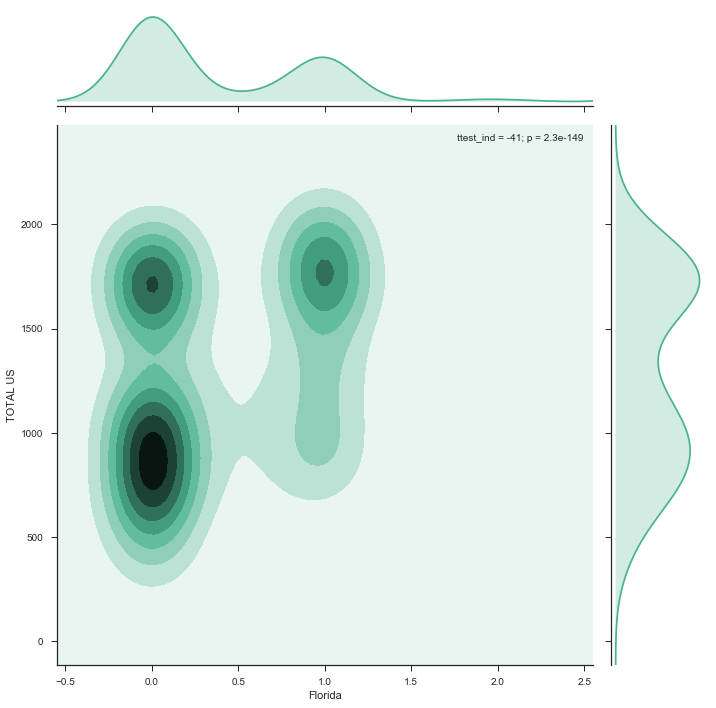

In [30]:
# Draw a KDE chart in Seaborn
sns.jointplot(x = rig_df['Florida'], y = rig_df['TOTAL US'], size = 10, #data = combined_df['TOTAL US'], 
              kind="kde", stat_func=ttest_ind, color="#4CB391")

#plt.xlim(0, 225)
#plt.ylim(2.5, 4)
plt.show()

In [ ]:
# Draw a KDE chart in Seaborn
sns.jointplot(x = combined_df['Unix'], y = combined_df['TOTAL US'], size = 10, #data = combined_df['TOTAL US'], 
              kind="kde", stat_func=kendalltau, color="#4CB391")

#plt.xlim(0, 225)
#plt.ylim(2.5, 4)
plt.show()

In [ ]:
# Draw a KDE chart in Seaborn
sns.jointplot(x = combined_df['TOTAL US'], y = combined_df['mag'], size = 10 # data = rig_count_df
              , kind="kde", stat_func= ttest_ind, 
              color="#4CB391")

#plt.xlim(0, 225)
#plt.ylim(2.5, 4)
plt.show()

In [ ]:
combined_df.columns

In [ ]:
# Run 1-Sample T-Test
stats.ttest_1samp(a=combined_df['TOTAL US'], popmean=combined_df['mag'].mean())

In [ ]:
# Run 2-Sample T-Test
stats.ttest_ind(combined_df['TOTAL US'], combined_df['mag'], equal_var=True)

In [ ]:
# Run 2-Sample T-Test
stats.ttest_ind(combined_df['Oklahoma'], combined_df['mag'], equal_var=False)

In [ ]:
# Run 2-Sample T-Test
stats.ttest_ind(combined_df['Alabama'], combined_df['mag'], equal_var=True)

In [ ]:
# Run 2-Sample T-Test
#stats.ttest_ind(seismic_df['mag'], rig_df['Texas'], equal_var=False)

In [ ]:
# Run Chi-Square Test to determine goodness of fit
#stats.chisquare(f_obs=sorority_counts, f_exp=sorority_expected)

In [ ]:
# Chi-squared with contingency
#stats.chi2_contingency(observed= observed)

In [ ]:
# Perform the ANOVA
#stats.f_oneway(asian, black, hispanic, other, white)